# Scikit-learn

In [1]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import os

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
from sklearn.linear_model import LogisticRegression, Ridge

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.svm import LinearSVC

In [4]:
os.chdir('C:/Users/C10381149/OneDrive - Technological University Dublin/Documents/Python/Datasets/')

## K Nearest Neighbors - Iris

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
iris=pd.read_csv('iris.csv')

In [8]:
iris.columns=['sepal_length','sepal_width','petal_length','petal_width','type']

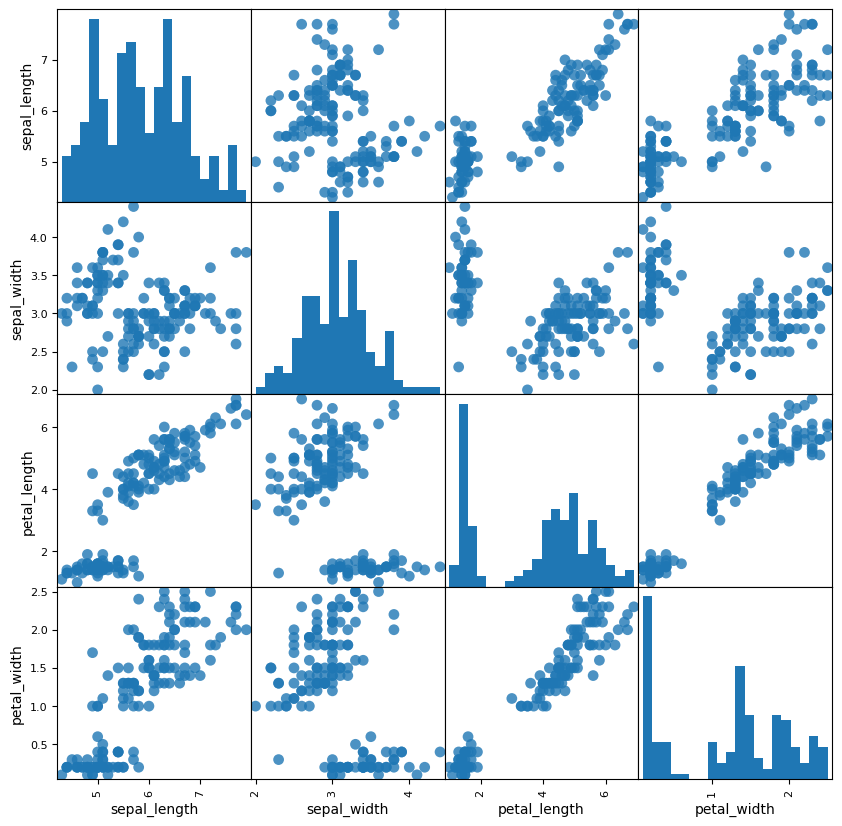

In [9]:
# Plot all features in the data against one another.
pd.plotting.scatter_matrix(iris[['sepal_length','sepal_width','petal_length','petal_width']], 
                           figsize=(10,10), marker="o", 
                           hist_kwds={"bins": 20}, 
                           s=60, alpha=0.8)
plt.show()

In [11]:
X = iris[['sepal_length','sepal_width','petal_length','petal_width']]

In [12]:
y = iris.type

In [13]:
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [15]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

In [19]:
y_pred=knn.predict(X_test)
print("Test set predictions:", y_pred)
print("Test set score: {:.2f}".format(np.mean(y_pred==y_test)))

Test set predictions: ['setosa' 'setosa' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'versicolor' 'virginica' 'virginica' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'versicolor' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'virginica' 'virginica' 'setosa' 'versicolor'
 'virginica' 'virginica']
Test set score: 0.97


In [20]:
# Alternatively, use knn.score
knn.score(X_test, y_test)

0.9736842105263158

In [21]:
neighbors=[]
train_score=[]
test_score=[]
for i in range(1,5):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    neighbors.append(i)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

In [23]:
df=pd.DataFrame({"Neighbors":neighbors, "Train Score": train_score, "Test Score": test_score})

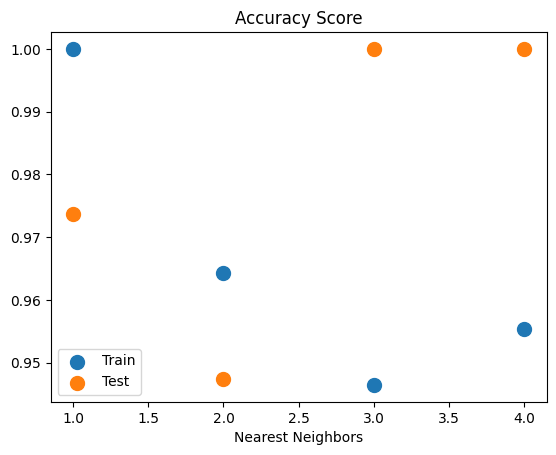

In [37]:
fig, ax = plt.subplots()
ax.scatter(df.Neighbors, df['Train Score'], label='Train', s=100)
ax.scatter(df.Neighbors, df['Test Score'], label='Test', s=1e2)
ax.set_title('Accuracy Score')
ax.set_xlabel('Nearest Neighbors')
ax.set_ylabel('')
plt.legend(loc='best')
plt.show()

# Chapter 2: Supervised Learning

## Logistic Regression - Cancer

Import the breast cancer data

In [4]:
cancer=pd.read_csv('breast_cancer.csv')
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malign


All columns apart from target will be features

In [ ]:
X = cancer[cancer.columns[cancer.columns != 'target']]
y = cancer['target']

Split both the features and target into a training and test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Train a linear logistic regression model on the training data. First, initialize the model then fit the training data.

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Use the score method to evaluate the model's accuracy on the test data.

In [ ]:
round(logreg.score(X_test, y_test),3)

Investigate whether the model can be improved by scaling the features. Initialize the min-max scaler, fit and then transform the features.

In [ ]:
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

Split the scaled features and target into a train and test sets.

In [ ]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

Fit the scaled traing data to a new logistic regression model.

In [ ]:
logreg2=LogisticRegression()
logreg2.fit(X_scaled_train, y_train)

See if the model trained on the scaled features performs better.

In [ ]:
round(logreg2.score(X_scaled_test, y_test),3)

Use the model to predict the outcome of a new data point.

In [ ]:
new=pd.DataFrame(X_scaled).sample()
logreg2.predict(new)[0]

## Linear Regression - Boston House Values

Import the boston dataset.

In [5]:
# See http://lib.stat.cmu.edu/datasets/boston for more information
boston=pd.read_csv('https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/datasets/data/boston_house_prices.csv?raw=True',
                   header=1)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


All columns will be features apart from MEDV which is the target. The features need to be scaled.

In [8]:
X = boston[boston.columns[boston.columns != 'MEDV']]
scaler=MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
y = boston['MEDV']

In [9]:
from sklearn.linear_model import LinearRegression

Split the features and target into train and test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Initialize a linear regression model and train on the training dataset.

In [14]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

See how the model performs on the test data. If $y$ is the true value, $\overline{y}$ is the mean of the true value and $\hat{y}$ is the predicted value then
$$
R^2 = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \overline{y})^2}.
$$
The closer $R^2$ is to unity, the better the model.

In [29]:
print("Linear Regression training score: {:.2f}".format(lr.score(X_train, y_train)))
print("Linear Regression test score: {:.2f}".format(lr.score(X_test, y_test)))

Linear Regression training score: 0.75
Linear Regression test score: 0.68


See how ridge performs in comparison with linear gression.

In [30]:
ridge=Ridge().fit(X_train,y_train)
print("Ridge training score: {:.0f}%".format(100*ridge.score(X_train,y_train)))
print("Ridge test score: {:.0f}%".format(100*ridge.score(X_test,y_test)))

Ridge training score: 74%
Ridge test score: 69%


In [32]:
pa=pd.concat([
    pd.DataFrame({'LR':lr.predict(X_test)}),
    pd.DataFrame({'Ridge':ridge.predict(X_test)}),
    pd.DataFrame({'True':y_test}).reset_index(drop=True)
], axis=1)
pa['LR']=round(pa['LR'],1)
pa['Ridge']=round(pa['Ridge'],1)
pa.sample(5)

,LR,Ridge,True
123,23.8,23.8,19.2
86,19.1,18.7,16.4
51,34.3,33.8,35.4
28,22.3,22.7,21.7
45,17.1,16.9,15.1


## Random Forests - Loans

In [114]:
loan=pd.read_csv('loan_data.csv')

In [115]:
loan.columns=['age','gender','education','income','employment_years','home_ownership',
              'loan_amount','loan_purpose','interest_rate','pc_income',
              'credit_history_years','credit_score','previous_default','approved']

In [116]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [117]:
loan=loan.drop(columns='pc_income')

In [118]:
ct=ColumnTransformer([('standard', StandardScaler(), 
                       ['age','income','employment_years','loan_amount','interest_rate',
                        'credit_history_years','credit_score']),
                      ('onehot', OneHotEncoder(sparse_output=False, drop='first'), 
                       ['gender','education','home_ownership','loan_purpose','previous_default'])])

In [119]:
features=loan.columns[loan.columns != 'approved']

In [121]:
X = ct.fit_transform(loan[features])

In [122]:
y=loan.approved

Use *stratisty=y* if the target is binany or categorical. This will make sure there is a proportional split of each distinct value.

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [124]:
forest=RandomForestClassifier(n_estimators=10, random_state=2).fit(X_train, y_train)

In [125]:
print("Training score: {:.3f}".format(forest.score(X_train, y_train)))
print("Test score: {:.3f}".format(forest.score(X_test, y_test)))

Training score: 0.994
Test score: 0.915


In [129]:
random_subject=loan[features].sample()
random_subject

,age,gender,education,income,employment_years,home_ownership,loan_amount,loan_purpose,interest_rate,credit_history_years,credit_score,previous_default
10779,23.0,female,High School,84811.0,0,MORTGAGE,10000.0,MEDICAL,14.79,2.0,617,No


In [130]:
approval_prob=forest.predict_proba(ct.transform(random_subject))[0][1]
print("Probability of Approval: {:.0f}%".format(100*approval_prob))

Probability of Approval: 20%


## Missing Data

In [38]:
path1='C:/Users/C10381149/OneDrive - Technological University Dublin/Documents/Python/'
path2='Datasets/PET_Data'
os.chdir(path1+path2)
pet=pd.DataFrame({'provider':[],'mrn':[],'reg':[],'age':[],
                  'triage':[],'edclinician':[],'depart':[],'destination':[]})
for f in os.listdir():
    pet=pd.concat([pet, pd.read_csv(f, header=0, names=pet.columns)])

In [45]:
pet=pet[pet.reg.astype(str).str.len()==20]

In [47]:
for i in ['reg','triage','edclinician','depart']:
    pet[i] = pd.to_datetime(pet[i], format="%d-%b-%Y %H:%M:%S")    

In [52]:
pet=pet[pet.depart.isna()==False]

In [48]:
pet['pet'] = (pet.depart - pet.reg)/pd.Timedelta(hours=1)

In [49]:
pet['hour']=pet.reg.dt.hour

In [50]:
pet['reg_triage']=(pet.triage-pet.reg)/pd.Timedelta(minutes=1)

In [51]:
pet['reg_edclinician']=(pet.edclinician-pet.reg)/pd.Timedelta(minutes=1)

In [53]:
pet['month']=pet.reg.dt.month

In [54]:
pet['season']=pet.month.apply(lambda x: 'spring' if x in [3,4,5] else
                              'summer' if x in [6,7,8] else
                              'autumn' if x in [9,10,11] else
                              'winter')

In [79]:
pet['destination']=pet.destination.fillna('Unknown')

In [104]:
old_destinations=list(pet.destination.unique())
new_destinations=[d.lower() for d in old_destinations]

In [107]:
for i in range(len(new_destinations)):
    for j, k in zip([' ','(',')'], ['_','','']):
        new_destinations[i]=new_destinations[i].replace(j,k)

In [111]:
pet['destination'] = pet.destination.replace(old_destinations, new_destinations)

In [119]:
pet923=pet[pet.provider==923].reset_index(drop=True)

In [116]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [120]:
pet923.head()

,provider,mrn,reg,age,triage,edclinician,depart,destination,pet,hour,reg_triage,reg_edclinician,month,season
0,923.0,507DBAA9CBFD96AE,2021-12-08 00:28:00,61.0,2021-12-08 00:37:23,2021-12-08 00:39:52,2021-12-08 07:33:11,admitted_to_ward,7.086389,0,9.383333,11.866667,12,winter
1,923.0,B9AE9E18CD0980FD,2021-12-08 00:39:00,71.0,2021-12-08 00:45:48,2021-12-08 09:51:26,2021-12-08 13:38:05,referred_to_opd,12.984722,0,6.800000,552.433333,12,winter
2,923.0,9CC6788FD705DD29,2021-12-08 01:01:00,84.0,2021-12-08 01:05:16,2021-12-08 01:58:46,2021-12-08 19:22:16,admitted_to_ward,18.354444,1,4.266667,57.766667,12,winter
3,923.0,54D4D839C2BFEEB9,2021-12-08 01:24:00,84.0,2021-12-08 01:37:58,2021-12-08 03:41:38,2021-12-08 08:08:22,admitted_to_ward,6.739444,1,13.966667,137.633333,12,winter
4,923.0,526454F01C7128E8,2021-12-08 02:06:00,82.0,2021-12-08 02:12:19,2021-12-08 10:13:54,2021-12-08 16:10:57,discharged_home,14.082500,2,6.316667,487.900000,12,winter


In [118]:
ct = ColumnTransformer([
    ('standard', StandardScaler(), ['age','pet']),
    ('onehot', OneHotEncoder(), ['destination'])
])

In [122]:
X = ct.fit_transform(pet923[['age','destination','pet','hour','month']])
y = pet923.reg_triage

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
from sklearn.svm import SVC

In [38]:
# Compare accuracy of the SVM on scaled and unscaled data
svc0=SVC().fit(X_train, y_train)
print("Accuracy of SVM trained on unscaled data on training data: {:.2f}".format(svc0.score(X_train,y_train)))
print("Accuracy of SVM trained on unscaled data on unscaled test data: {:.2f}".format(svc0.score(X_test,y_test)))

Accuracy of SVM trained on unscaled data on training data: 0.90
Accuracy of SVM trained on unscaled data on unscaled test data: 0.94


In [41]:
svc1=SVC().fit(X_train_scaled, y_train)
print("Accuracy of SVM trained on scaled data on training data: {:.2f}".format(svc1.score(X_train_scaled,y_train)))
print("Accuracy of SVM trained on scaled data on unscaled test data: {:.2f}".format(svc1.score(X_test_scaled,y_test)))

Accuracy of SVM trained on scaled data on training data: 0.98
Accuracy of SVM trained on scaled data on unscaled test data: 0.97


In [10]:
from sklearn.neural_network import MLPClassifier

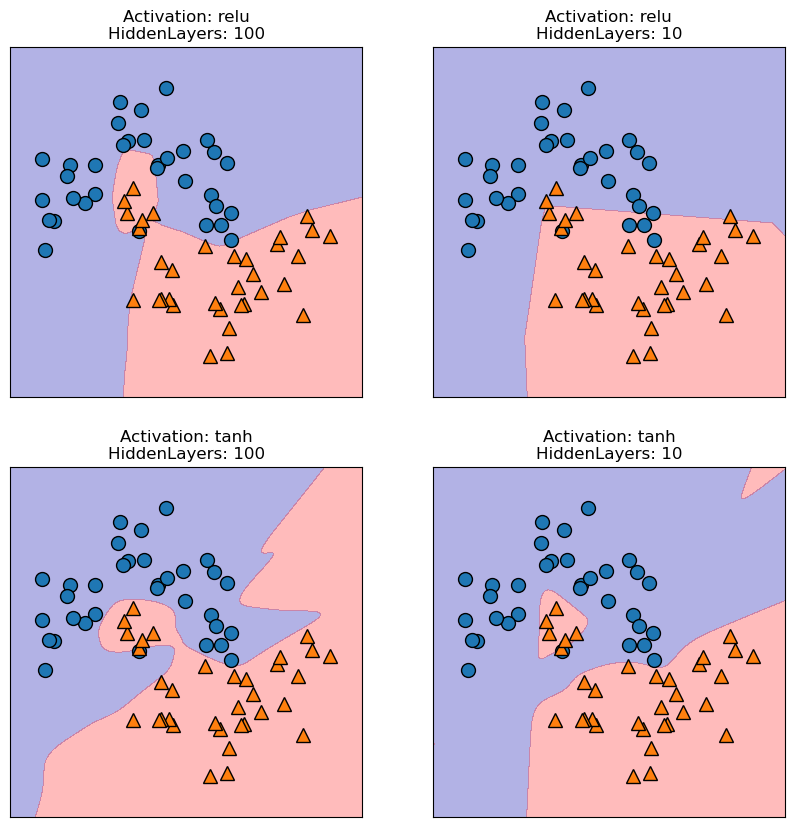

In [68]:
X, y = make_moons(n_samples=90, noise=.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(10,10))
act=["relu","relu","tanh","tanh"]
hidden=[100,10,100,10]
for a, h, ax in zip(act, hidden, axes.ravel()):# You need to use .ravel() is there's more than one row of subplots
    mlp=MLPClassifier(solver="lbfgs", activation=a, hidden_layer_sizes=h, random_state=0).fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
    ax.set_title("Activation: {}\nHiddenLayers: {}".format(a,h))

plt.show()

In [12]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data, cancer.target, random_state=0)

In [36]:
mean_on_train=X_train.mean(axis=0)# Use axis=0 to calculate the feature averages; if you want the row averages use axis=1
std_on_train=X_train.std(axis=0)
X_train_scaled=(X_train-mean_on_train)/std_on_train

mean_on_test=X_test.mean(axis=0)
std_on_test=X_test.std(axis=0)
X_test_scaled=(X_test-mean_on_test)/std_on_test

mlp=MLPClassifier(random_state=42).fit(X_train_scaled, y_train)
print("Accuracy on scaled training data: {:.1f}%".format(1e2*mlp.score(X_train_scaled,y_train)))
print("Accuracy on scaled test data: {:.1f}%".format(1e2*mlp.score(X_test_scaled,y_test)))

Accuracy on scaled training data: 99.3%
Accuracy on scaled test data: 95.8%


D:\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
X, y = make_circles(noise=.25, factor=.5, random_state=1)
y_named=np.array(["blue","red"])[y]
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

The output of decision_function is a quantitative measure of the model's confidence in it's prediction. A positive value indicates a preference for the positive class, a negative value indicates a preference for the negative class.

In [27]:
print("X_test_shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))

X_test_shape: (25, 2)
Decision function shape: (25,)


In [28]:
gbrt.decision_function(X_test)

array([ 4.13592603, -1.70169917, -3.95106099, -3.62609552,  4.28986642,
        3.66166081, -7.69097179,  4.11001686,  1.10753937,  3.40782222,
       -6.46255955,  4.28986642,  3.90156346, -1.20031247,  3.66166081,
       -4.17231157, -1.23010079, -3.91576223,  4.03602783,  4.11001686,
        4.11001686,  0.65709014,  2.69826265, -2.65673274, -1.86776596])

In [29]:
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [30]:
gt0=(gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[gt0]
print("pred is equal to model predictions: {}".format(np.all(pred == gbrt.predict(X_test))))

pred is equal to model predictions: True


In [31]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


The predict_proba function is easier to understand. The column 1 is the probability of class 1, column 2 is the probability of class 2.

In [32]:
gbrt.predict_proba(X_test).round(2)[0:6,]

array([[0.02, 0.98],
       [0.85, 0.15],
       [0.98, 0.02],
       [0.97, 0.03],
       [0.01, 0.99],
       [0.03, 0.97]])

In [33]:
y_test[0:6]

array([1, 0, 0, 0, 1, 1], dtype=int64)

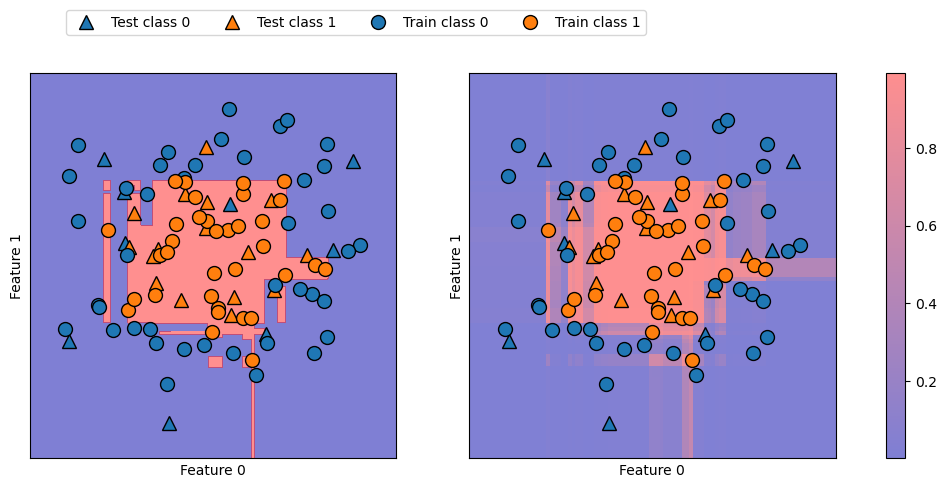

In [34]:
fig, axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.5, fill=True, cm=mglearn.cm2)
scores_image=mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], cm=mglearn.ReBl, function="predict_proba", alpha=.5)
for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers="^", ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers="o", ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar=plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0","Test class 1","Train class 0","Train class 1"], ncol=4, loc=(.1,1.1))
plt.show()

decision_function is not restricted to data with only two classes. The iris_dataset has three classes, the output of decision_function is a certainty score for each class; the same is trues for predict_proba.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target, random_state=42)
gbrt=GradientBoostingClassifier(learning_rate=.01, random_state=0)
gbrt.fit(X_train, y_train)
gbrt.decision_function(X_test)[0:6]

array([[-1.995715  ,  0.04758267, -1.92720695],
       [ 0.06146394, -1.90755736, -1.92793758],
       [-1.99058203, -1.87637861,  0.09686725],
       [-1.995715  ,  0.04758267, -1.92720695],
       [-1.99730159, -0.13469108, -1.20341483],
       [ 0.06146394, -1.90755736, -1.92793758]])

In [17]:
gbrt.predict_proba(X_test)[0:6]

array([[0.10217718, 0.78840034, 0.10942248],
       [0.78347147, 0.10936745, 0.10716108],
       [0.09818072, 0.11005864, 0.79176065],
       [0.10217718, 0.78840034, 0.10942248],
       [0.10360005, 0.66723901, 0.22916094],
       [0.78347147, 0.10936745, 0.10716108]])

In [21]:
print("Argmax of predicted probabilities: {}".format(np.argmax(gbrt.predict_proba(X_test[0:6]), axis=1)))
print("Predicted target: {}".format(gbrt.predict(X_test[0:6])))

Argmax of predicted probabilities: [1 0 2 1 1 0]
Predicted target: [1 0 2 1 1 0]


# Chapter 3: Unsupervised Learning & Preprocessing

In unsupervised learning, the algorithm isn't given any known output, it just looks and the input data it's given and asked to extract knowledge from it.

In [4]:
iris=pd.read_csv('iris.csv')
iris.columns=['sepal_length','sepal_width','petal_length','petal_width','type']

In [13]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,type
67,5.8,2.7,4.1,1.0,versicolor
40,5.0,3.5,1.3,0.3,setosa
31,5.4,3.4,1.5,0.4,setosa
62,6.0,2.2,4.0,1.0,versicolor
20,5.4,3.4,1.7,0.2,setosa


In [73]:
from sklearn.cluster import k_means
from sklearn.preprocessing import MinMaxScaler

In [74]:
features=['sepal_length','sepal_width','petal_length','petal_width']

In [75]:
scaler=MinMaxScaler()

In [76]:
X=scaler.fit_transform(iris[features])

In [77]:
centroid, labels, inertia=k_means(X, n_clusters=3)

In [79]:
df=pd.DataFrame({'type':iris.type, 'cluster':labels})
df.sample(5)

,type,cluster
22,setosa,1
115,virginica,0
132,virginica,0
74,versicolor,2
75,versicolor,2


In [35]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
print("per-feature minimum before scaling:\n{}".format(X_train.min(axis=0)))
print("per-feature minimum after scaling:\n{}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum before scaling:\n{}".format(X_train.max(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_train_scaled.max(axis=0)))

In [20]:
X_test_scaled=scaler.transform(X_test)
print("per-feature minimum after scaling:\n\n{}\n".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:

[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]

per-feature maximum after scaling:

[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

fig, axes = plt.subplots(1,3, figsize=(15,5))

axes[0].scatter(X_train[:,0], X_train[:,1], label="Training set", s=60)
axes[0].scatter(X_test[:,0], X_test[:,1], label="Test set", s=60, marker="^")
axes[0].legend(loc="best")
axes[0].set_title("Original Data")

scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1], s=60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], s=60, marker="^")
axes[1].set_title("Scaled Data")

# WARNING: do not do this
scaler2=MinMaxScaler()
X_test_scaled2=scaler2.fit(X_test)
X_train_scaled2=scaler2.transform(X_train)
X_test_scaled2=scaler2.transform(X_test)

axes[2].scatter(X_train_scaled2[:,0], X_train_scaled2[:,1], s=60)
axes[2].scatter(X_test_scaled2[:,0], X_test_scaled2[:,1], s=60, marker="^")
axes[2].set_title("Improperly Scaled Data")

plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm=SVC(C=100)
svm.fit(X_train,y_train)
print("Test accuracy: {:.2f}".format(svm.score(X_test, y_test)))
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
svm=SVC(C=100)
svm.fit(X_train_scaled,y_train)
print("Scaled Test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Principal component analysis (PCA) is where the data is rotated such that the features are uncorrelated, followed by selecting only a subset of the features according to how important they are for explaining the data. The direction of maximum variance is Component 1, the algoritm then finds the orthogonal direction to Component 1 that contains the most information, this is Component 2. If there are only two features then this calculation is trivial, but when there is more features then there are an infinitely many orthogonal directions. When we talk about the principal components, we mean the main directions of variance in the data. PCA can be used to remove noise from the data by using only the first principal component.

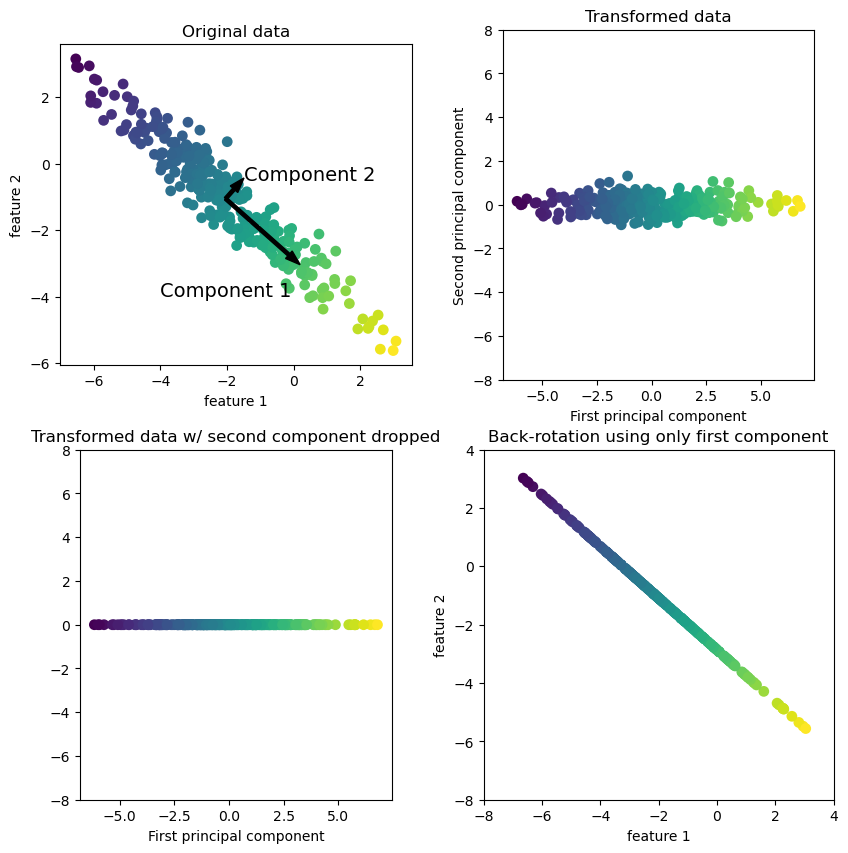

In [2]:
mglearn.plots.plot_pca_illustration()

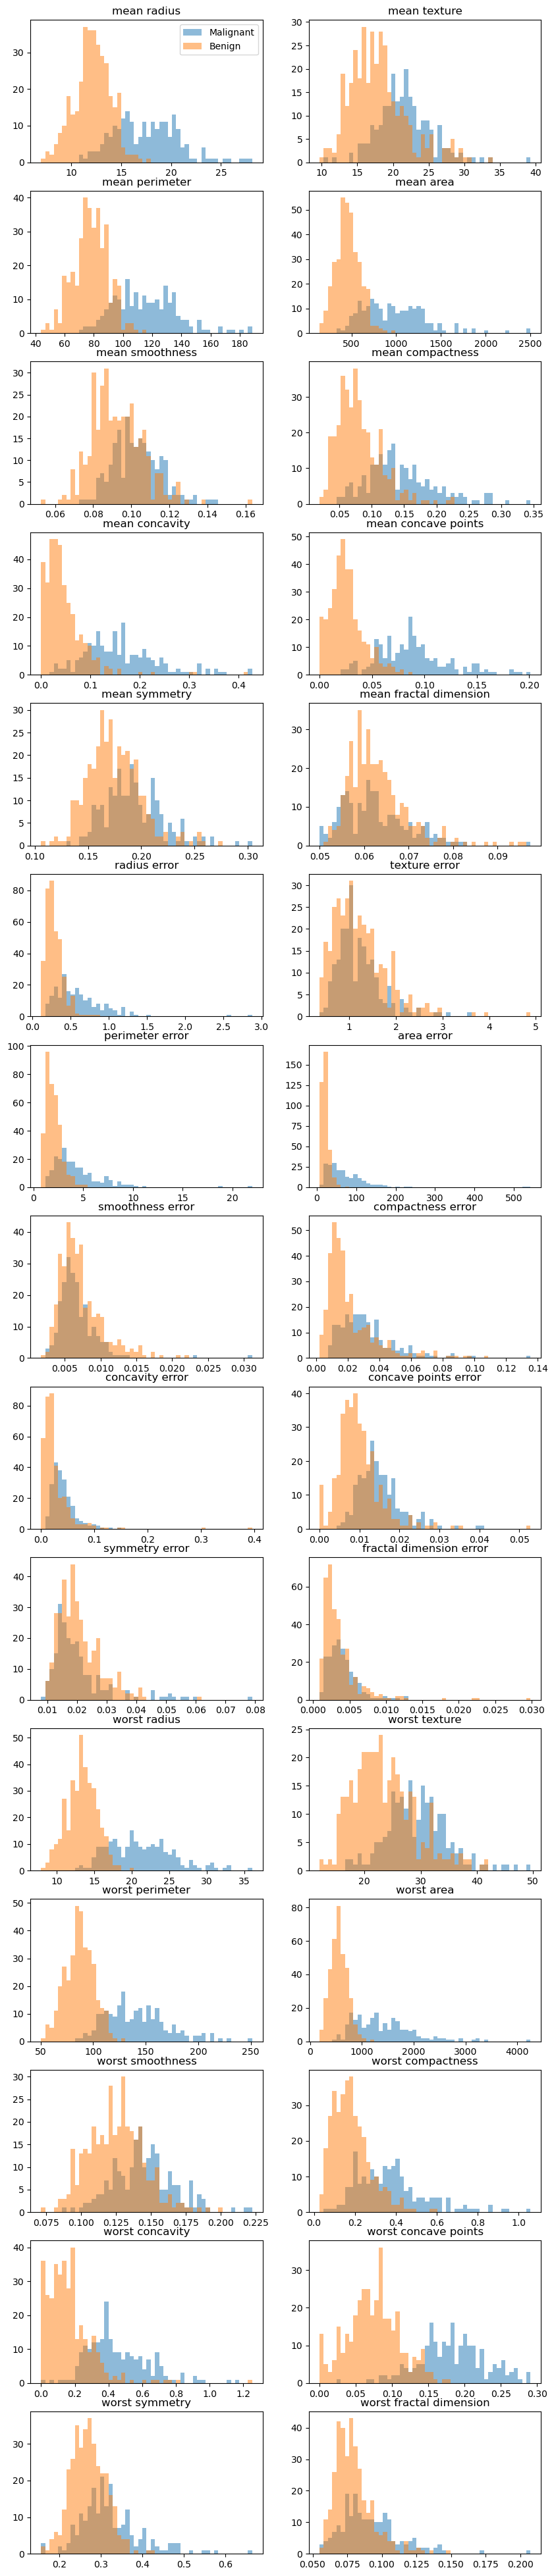

In [37]:
# A histogram is one method that can be used to identify which features are best at classifying
fig, axes = plt.subplots(15, 2, figsize=(10,50))
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]
ax=axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
ax[0].legend(["Malignant","Benign"])
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler

In [41]:
# The StandardScaler class creates a new data set, the features of which have mean 0 abd variabnce 1.
scaler=StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [43]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

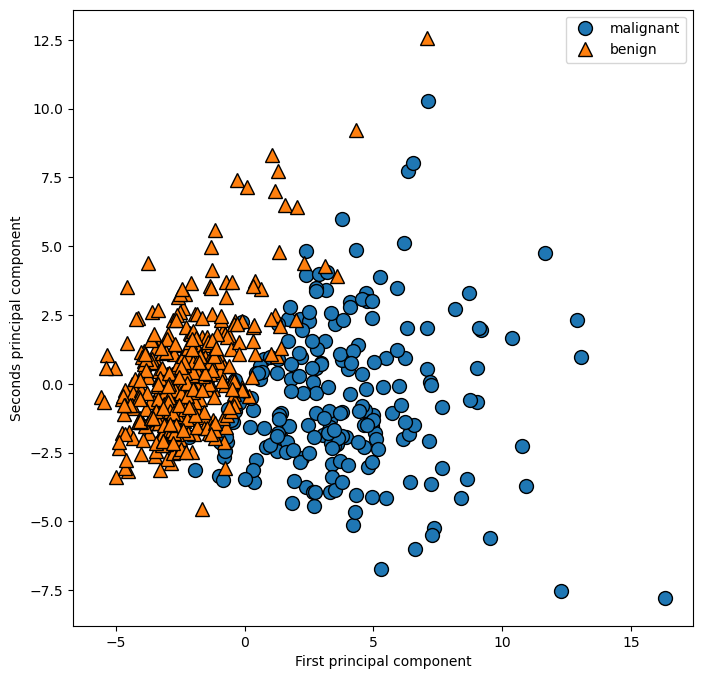

In [47]:
# A scatter plot of the the first two principal components is a good way to classify the data.
pca=PCA(n_components=2)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names)
plt.xlabel("First principal component")
plt.ylabel("Seconds principal component")
plt.show()

In [37]:
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))

PCA component shape: (2, 30)
PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


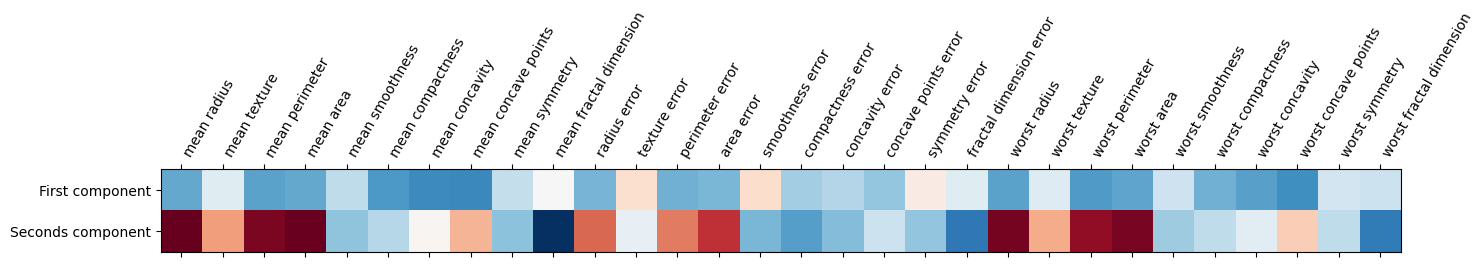

In [47]:
plt.matshow(pca.components_, cmap="RdBu")
plt.yticks([0,1], ["First component","Seconds component"])
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha="left")
plt.show()

In [ ]:
from sklearn.datasets import fetch_lfw_people

In [ ]:
people=fetch_lfw_people(min_faces_per_person=20, resize=.7)
image_shape=people.images[0].shape

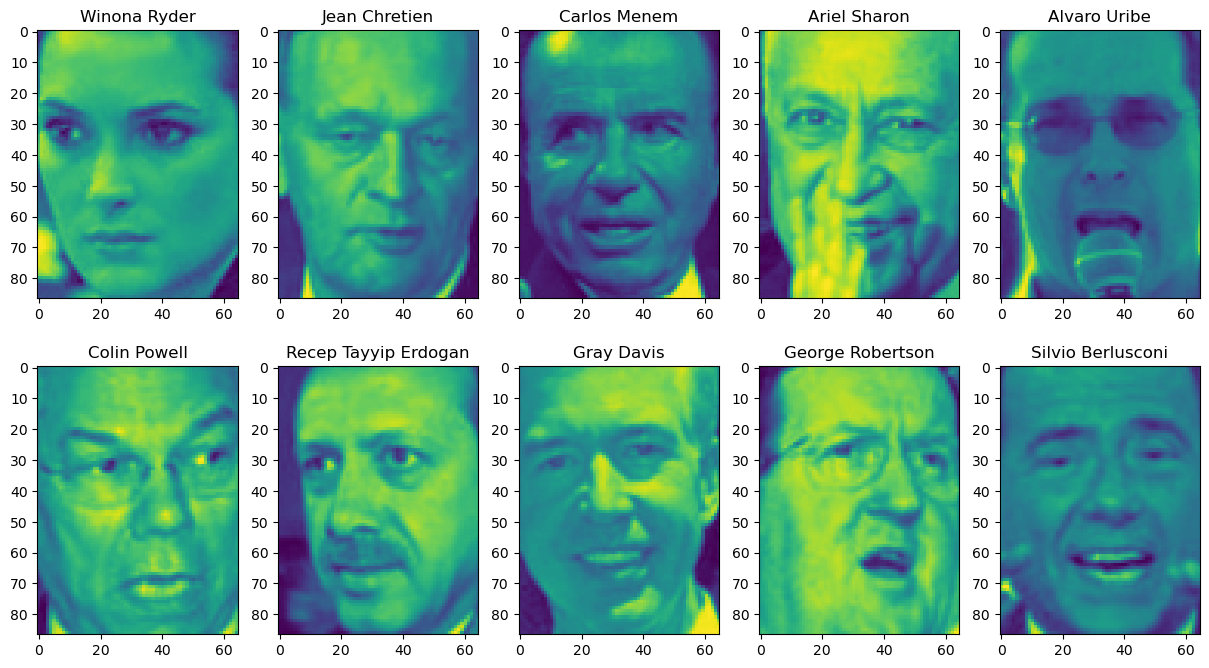

In [3]:
fix, axes = plt.subplots(2, 5, figsize=(15,8))
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [4]:
mask = np.zeros(people.target.shape, dtype=bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people=people.data[mask]
y_people=people.target[mask]
X_people=X_people/255

from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, random_state=0, stratify=y_people)
knn=KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
print("Test score of 1-nn: {:.2f}".format(knn.score(X_test,y_test)))

Test score of 1-nn: 0.22


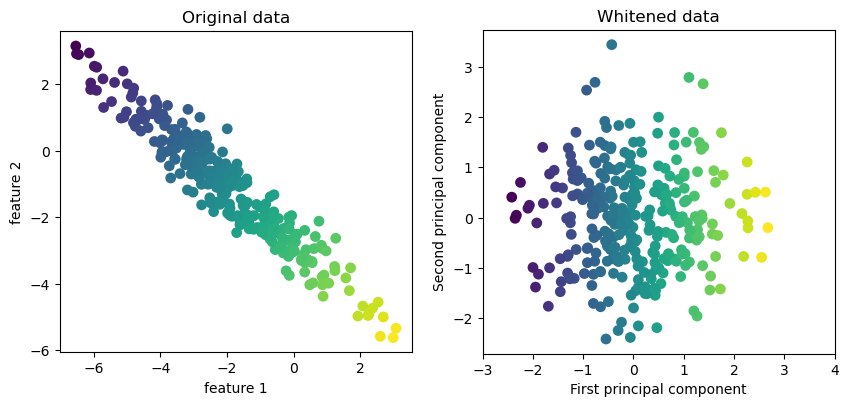

In [59]:
mglearn.plots.plot_pca_whitening()

In [61]:
pca=PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=1).fit(X_train_pca, y_train)
print("New test score of 1-nn: {:.2f}".format(knn.score(X_test_pca,y_test)))

New test score of 1-nn: 0.30


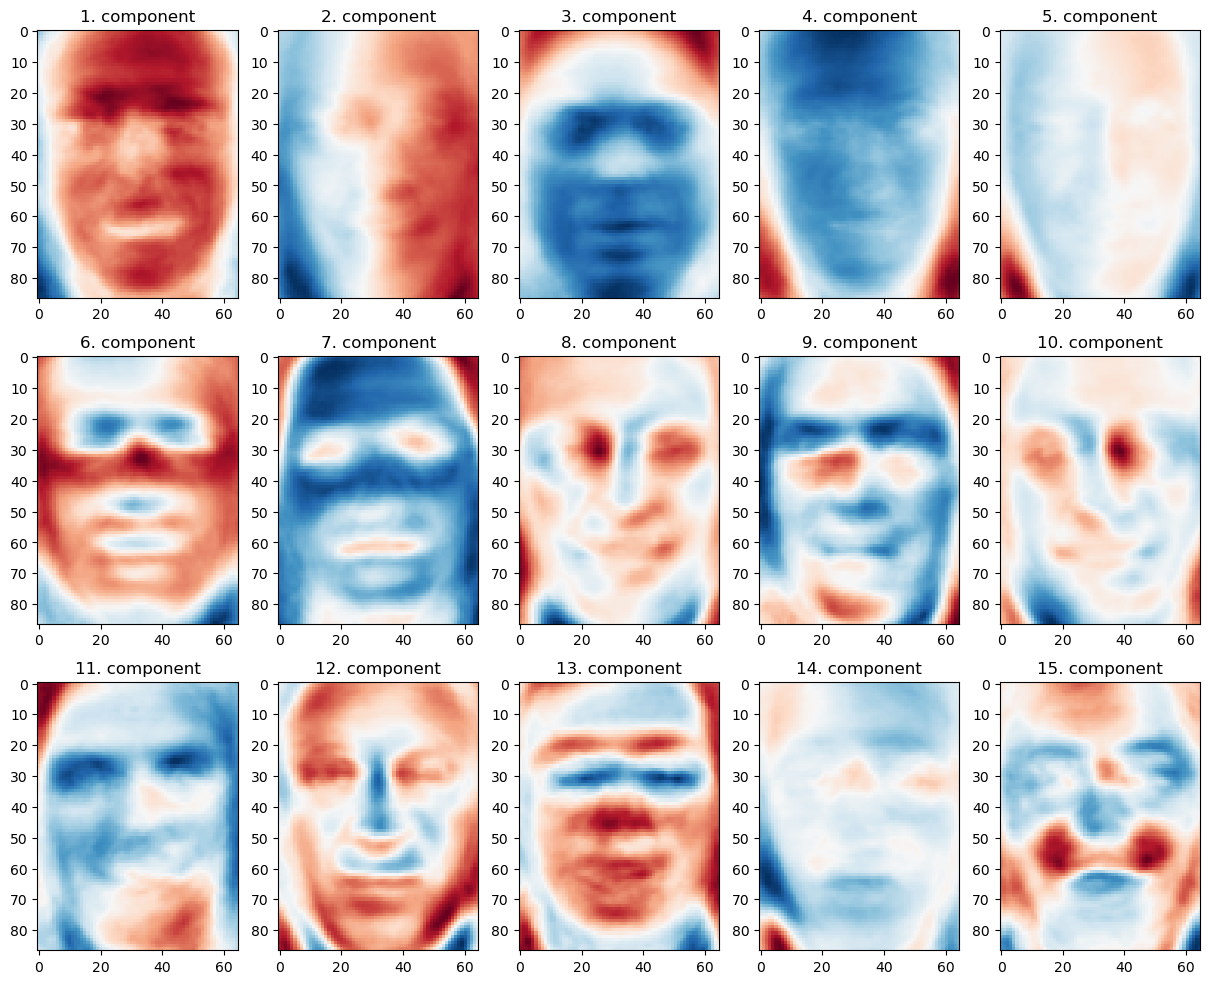

In [63]:
fig, axes = plt.subplots(3, 5, figsize=(15,12))
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap="RdBu")
    ax.set_title("{}. component".format((i+1)))

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf=nmf.transform(X_train)
X_test_nmf=nmf.transform(X_test)
fig, axes = plt.subplots(3, 5, figsize=(15,12))
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

In [59]:
#The digits dataset is just random digits
from sklearn.datasets import load_digits
digits=load_digits()

In [61]:
from sklearn.manifold import TSNE

In [649]:
import matplotlib.colors as mcolors
tableau_colors=list(mcolors.TABLEAU_COLORS)

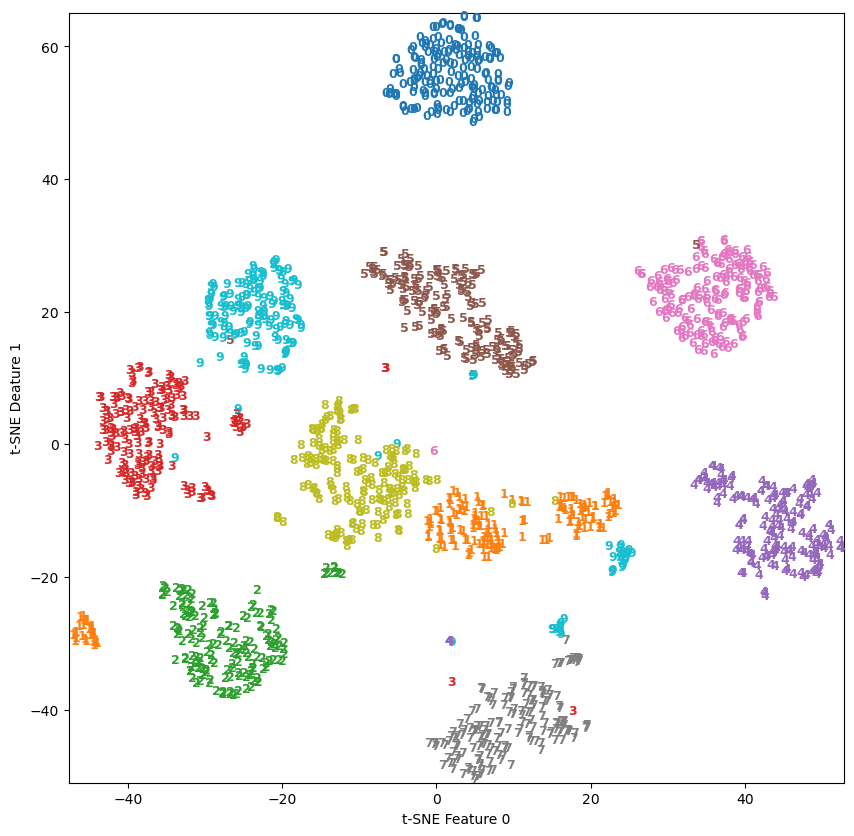

In [645]:
tsne=TSNE(random_state=0)
digits_tsne=tsne.fit_transform(digits.data)

plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]), 
             color = tableau_colors[digits.target[i]],
             fontdict={"weight":"bold", "size":9})
plt.xlabel("t-SNE Feature 0")
plt.ylabel("t-SNE Deature 1")
plt.show()

In [65]:
from sklearn.datasets import make_blobs

In [67]:
from sklearn.cluster import KMeans

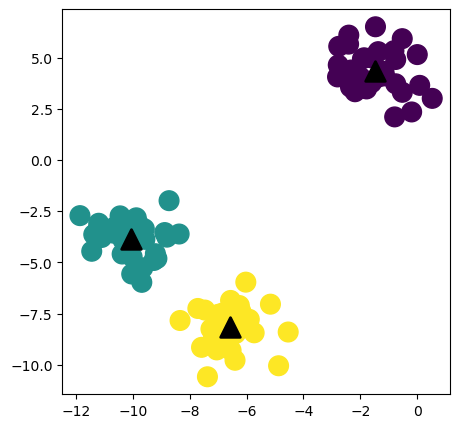

In [809]:
# K-means can be used to classify the data by identifying clusters in the scatter plot.
X, y = make_blobs(random_state=1)
kmeans=KMeans(n_clusters=3, n_init=3)
kmeans.fit(X)

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=200, marker="o")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c="black",
            marker="^", linewidths=2, edgecolors="black")
plt.show()

In [737]:
from sklearn.cluster import AgglomerativeClustering

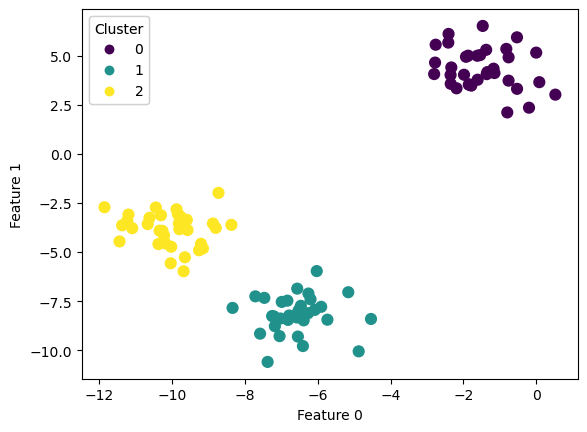

In [741]:
agg=AgglomerativeClustering(n_clusters=3)
assignment=agg.fit_predict(X)
fig, ax = plt.subplots()
scatter=ax.scatter(X[:,0], X[:,1], c=assignment, s=60, marker="o")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
legend1=ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)
plt.show()

In [13]:
from sklearn.datasets import make_moons

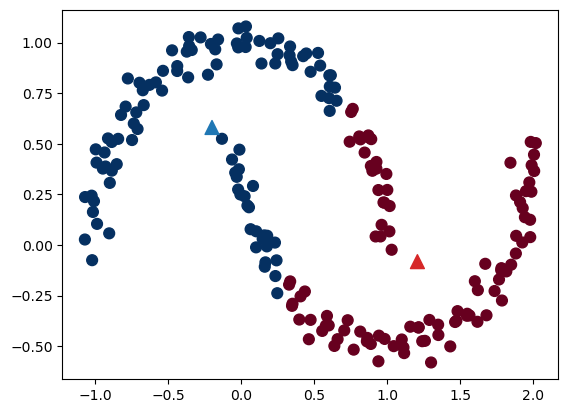

In [807]:
# K-means clustering isn't much use when one has complex shapes.
X, y = make_moons(n_samples=200, noise=.05, random_state=0)
kmeans=KMeans(n_clusters=2, n_init=2).fit(X)
y_pred=kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred, s=60, cmap="RdBu")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, marker="^", c=["tab:red","tab:blue"])
plt.show()

In [747]:
from sklearn.cluster import DBSCAN

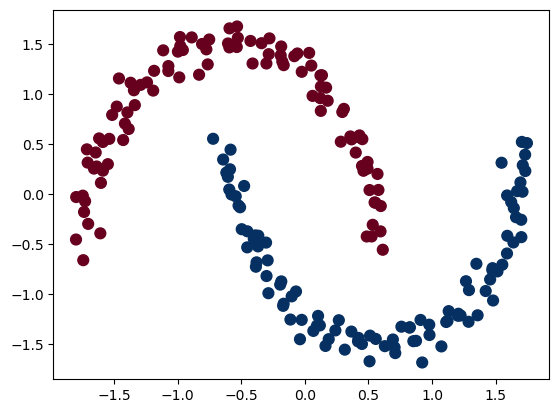

In [749]:
# For complex shapes DBSCAN is much better. 
X_scaled=StandardScaler().fit_transform(X)
clusters=DBSCAN().fit_predict(X_scaled)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, s=60, cmap="RdBu")
plt.show()

In [797]:
# Adjusted Rand Score (ARI)
from sklearn.metrics.cluster import adjusted_rand_score

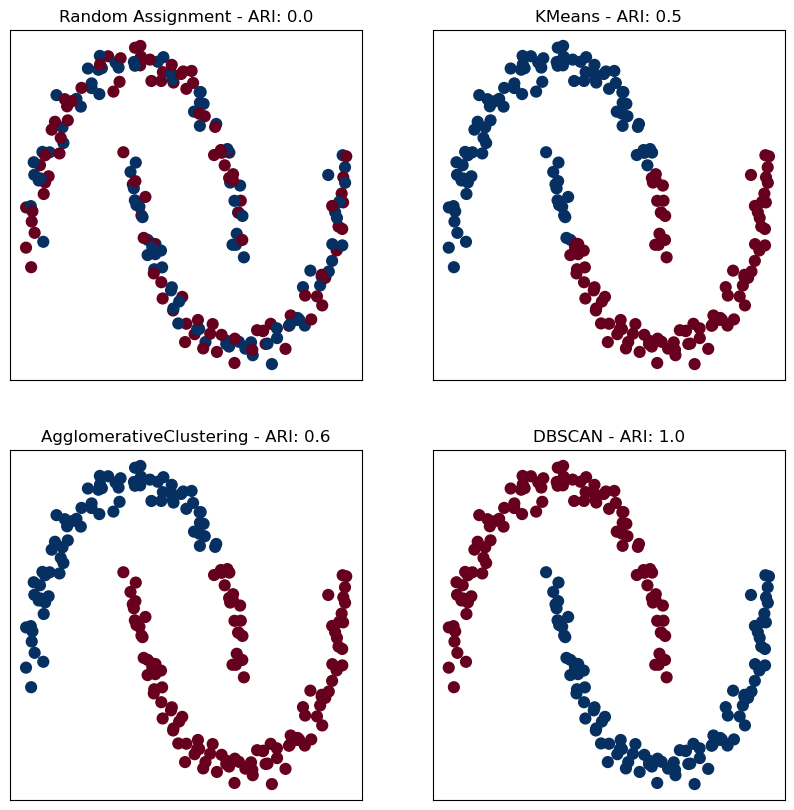

In [801]:
# Plot a comparison of k-means, agglomerative clustering and DBSCAN;
# the ARI is a quantitative measure of the performance.
X_scaled=StandardScaler().fit_transform(X)
fig, axes = plt.subplots(2, 2, figsize=(10,10), subplot_kw={"xticks":(), "yticks":()})
algorithms=[KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
random_state=np.random.RandomState(seed=0)
random_clusters=random_state.randint(low=0, high=2, size=len(X))
axes.ravel()[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters, s=60, cmap="RdBu")
axes.ravel()[0].set_title("Random Assignment - ARI: {:.1f}".format(adjusted_rand_score(y, random_clusters)))
for ax, algorithm in zip(axes.ravel()[1:], algorithms):
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=algorithm.fit_predict(X_scaled), s=60, cmap="RdBu")
    ax.set_title("{} - ARI: {:.1f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, algorithm.fit_predict(X_scaled))))
plt.show()

# Chapter 4: Representing Data & Engineering Features

Import PET data

In [ ]:
os.chdir('C:/Users/C10381149/OneDrive - Technological University Dublin/Documents/Python/Datasets/PET_Data')
pet=pd.DataFrame({'provider':[],'mrn':[],'reg':[],'age':[],
                  'triage':[],'edclinician':[],'depart':[],'destination':[]})
for f in os.listdir():
    pet=pd.concat([pet, pd.read_csv(f, header=0, names=pet.columns)])

# Change timestamp columns from character strings to datetime objects
for i in ['reg','triage','edclinician','depart']:
    pet[i] = pd.to_datetime(pet[i], format="%d-%b-%Y %H:%M:%S")
    

In [107]:
pet['pet'] = (pet.depart - pet.reg)/pd.Timedelta(hours=1)

In [98]:
pet=pet.drop(columns='mrn')

In [108]:
pet['pet'] = pet['pet'].apply(lambda x: 'NaN' if x < 0 or x > 72 or x=='NaN' else x)

In [114]:
pet['pet']=pet['pet'].astype(float)

In [65]:
pet['year']=pet.reg.dt.year
pet['month']=pet.reg.dt.month

In [66]:
pet['season']=pet['month'].apply(lambda x: 'winter' if x in [1,2,12] else 
                                 'spring' if x in [3,4,5] else
                                 'summer' if x in [6,7,8] else 'autumn')

In [67]:
pet['ageGroup']=pet['age'].apply(lambda x: 'Unknown' if x < 0 or x > 110 else
                                 'Paediatric 0-16' if x < 16 else 
                                 'Adult 16-75' if x in list(range(16,76)) else 'Adult 75+')

In [127]:
petSubset=pet[pet['pet'].isna()==False].query("provider==923 and reg >= '2021-01-01' and reg < '2021-12-31'")
petSubset.head()

,provider,reg,age,triage,edclinician,depart,destination,pet,ageGroup,year,month,season
214,923.0,2021-04-09 08:36:00,41.0,2021-04-09 08:47:55,2021-04-09 09:30:49,2021-04-09 12:45:00,Discharged Home,4.150000,Adult 16-75,2021,4,spring
215,923.0,2021-04-09 08:26:36,35.0,NaT,2021-04-09 08:41:59,2021-04-09 09:00:00,Discharged Home,0.556667,Adult 16-75,2021,4,spring
216,923.0,2021-04-09 08:36:00,45.0,2021-04-09 08:43:00,2021-04-09 08:52:28,2021-04-09 15:20:44,Discharged Home,6.745556,Adult 16-75,2021,4,spring
217,923.0,2021-04-09 08:42:25,33.0,NaT,2021-04-09 08:50:11,2021-04-09 09:15:36,Discharged Home,0.553056,Adult 16-75,2021,4,spring
218,923.0,2021-04-09 08:40:00,81.0,2021-04-09 08:51:13,2021-04-09 09:18:39,2021-04-09 14:20:00,Discharged Home,5.666667,Adult 75+,2021,4,spring


In [118]:
oneHotPetSubset=pd.get_dummies(petSubset[['season','ageGroup','destination','pet']], dtype=int)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
    oneHotPetSubset[oneHotPetSubset.columns[oneHotPetSubset.columns != 'pet']],
    oneHotPetSubset.pet,
    random_state=0)

In [120]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [126]:
pd.DataFrame({'predicted':lm.predict(X_test),
             'observed':y_test})

,predicted,observed
112278,7.597656,6.383333
71121,9.904785,0.770278
1826,10.875488,13.531667
107324,6.339844,15.714722
32541,9.975586,6.647222
...,...,...
22608,7.643066,2.346667
91149,7.643066,6.281389
104562,11.278809,12.062222
32645,9.975586,13.605000
